<h1 align = 'center'> Heart Attack Analysis And Prediction </h1>

## Project Content
1. [Introdction](#1)

    *1.1 [topic](#2)

## Introduction <a id=1></a>

### Variable Description
- Age: age in years<br />
- Sex: Sex of the patient<br />
    - Value 1: male<br />
    - Value 0: female<br />
- exang: exercise induced angina<br />
    - Value 1: yes<br />
    - Value 0: no<br />
- ca: number of major vessels (0-3)<br />
- cp: Chest Pain type chest pain type<br />
    - Value 1: typical angina<br />
    - Value 2: atypical angina<br />
    - Value 3: non-anginal pain<br />
    - Value 4: asymptomatic<br />
- trtbps: resting blood pressure (in mm Hg)<br />
- chol: cholestoral in mg/dl fetched via BMI sensor<br />
- fbs: (fasting blood sugar > 120 mg/dl)<br />
    - Value 1: true<br />
    - Value 0: false<br />
- restecg: resting electrocardiographic results<br />
    - Value 0: normal<br />
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br />
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br />
- thalach: maximum heart rate achieved<br />
- num: the predicted attribute - diagnosis of heart disease (angiographic disease status)<br />
    - Value 1: > 50% diameter narrowing<br />
    - Value 0: < diameter narrowing<br />
- slope: the slope of the peak exercise ST segment<br />
    - Value 1: flat<br />
    - Value 2: upsloping<br />
    - Value 0: downsloping<br />
- target: <br />
    - Value 1: more chance of heart attack<br />
    - Value 0: less chance of heart attack<br />

## Exploratory Data Analysis
### Required Libraries

In [42]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# disables the display of warnings
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [10]:
url = "https://raw.githubusercontent.com/audrey-rw5683/HeartAttackPrediction/main/heart.csv"
heart = pd.read_csv(url)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Wrangling

In [11]:
# rename colunms
heart.columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# display dataset properties
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check missing and unique values

In [25]:
# check missing values
isnull_number = []
for i in heart.columns:
    x = heart[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number, index = heart.columns, columns=['Total missing values'])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


Text(0.5, 1.0, 'Examing missing values')

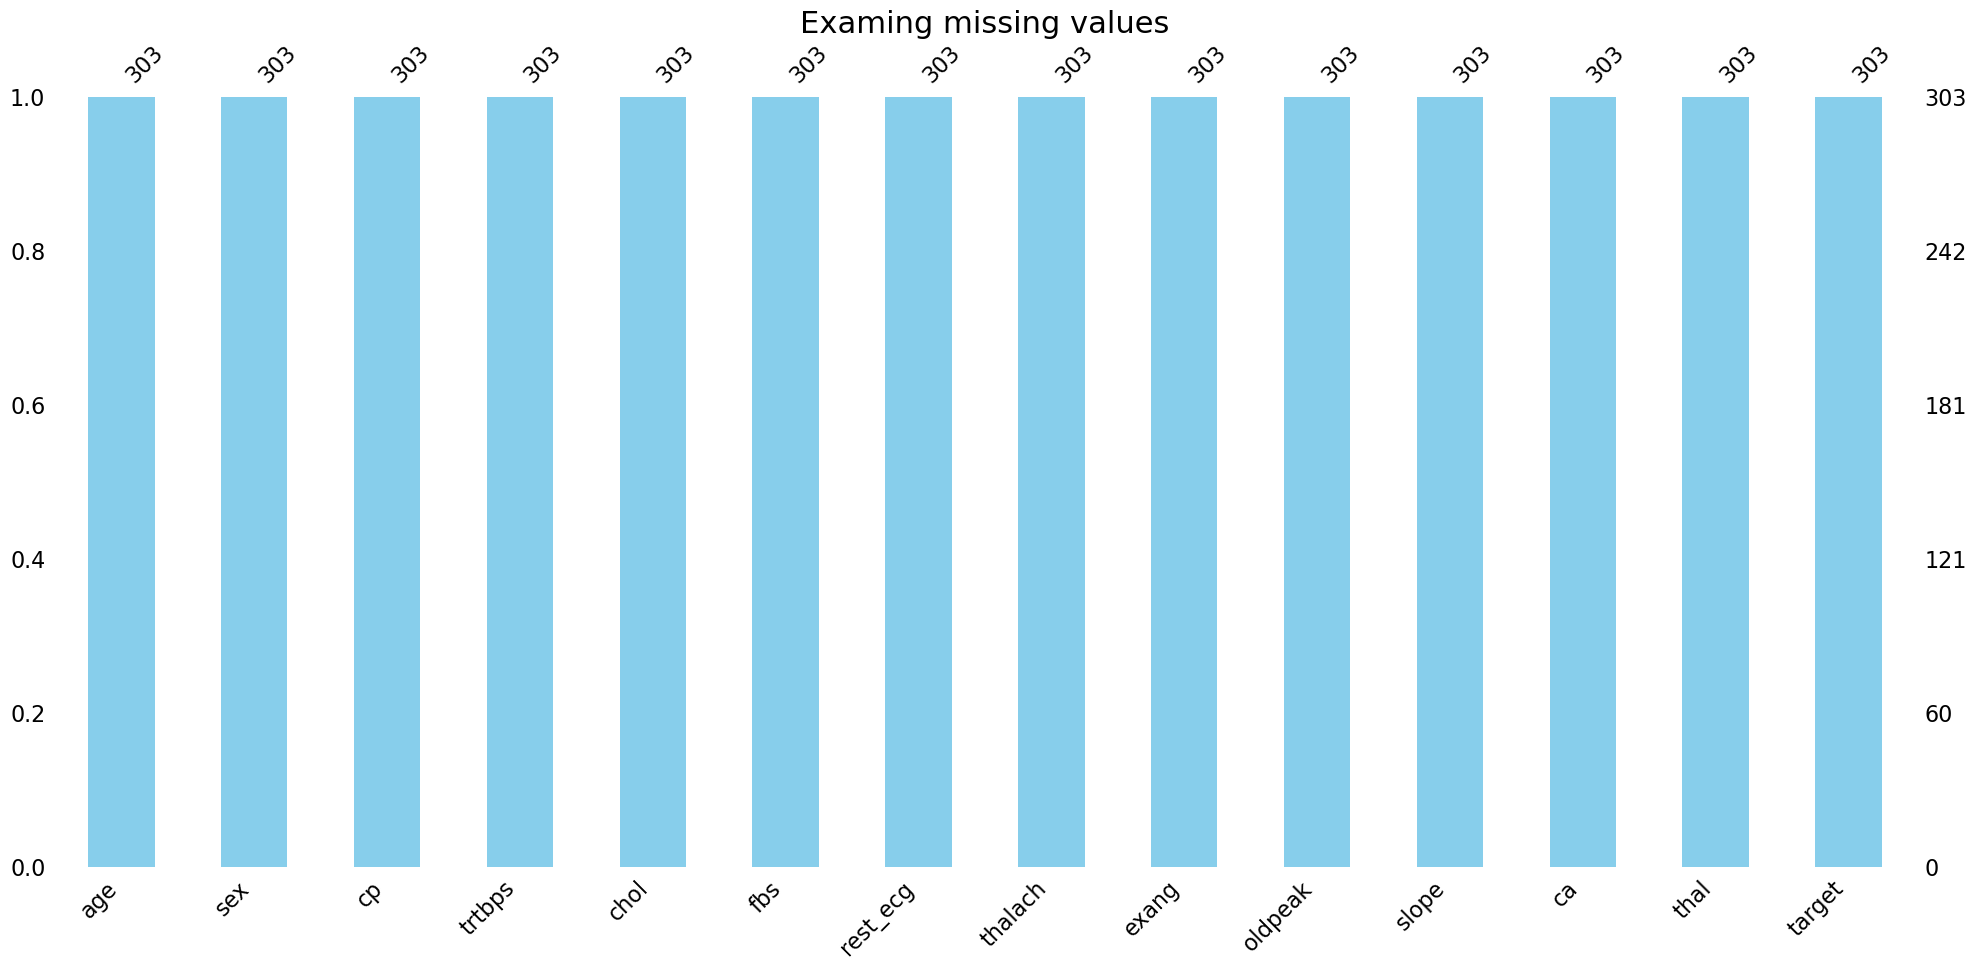

In [48]:
msno.bar(heart, color = 'skyblue').set_title('Examing missing values',fontsize=22)

In [50]:
# check unique values
unique_number = []
for i in heart.columns:
    x = heart[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number, index = heart.columns, columns=['Total number of unique values'])

,Total number of unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


### Findings

### Statistics of variables

In [52]:
# separate variables into numeric and categorical variables
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

In [54]:
heart[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Figure size 320x240 with 0 Axes>

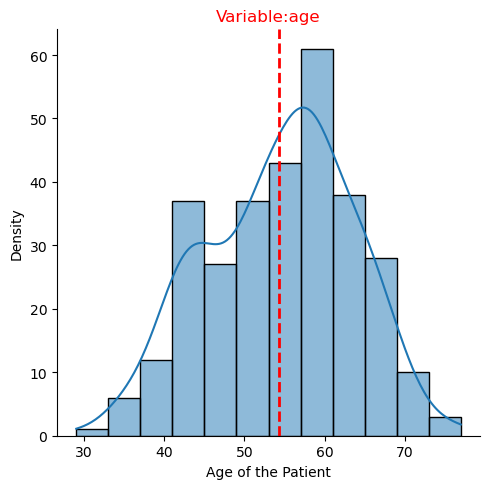

<Figure size 320x240 with 0 Axes>

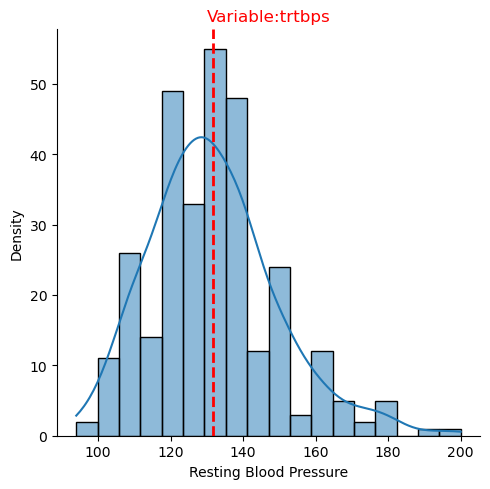

<Figure size 320x240 with 0 Axes>

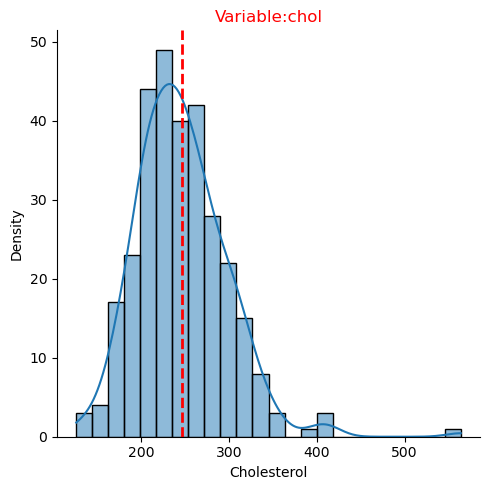

<Figure size 320x240 with 0 Axes>

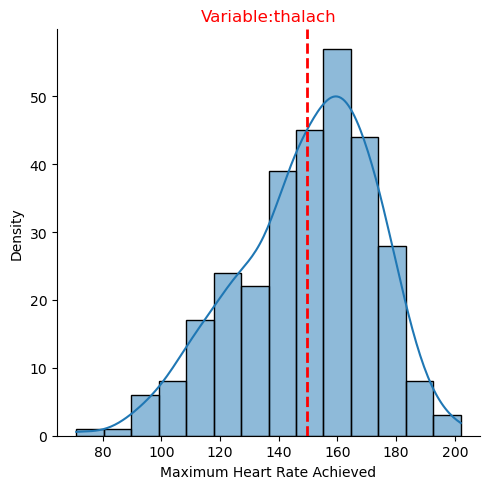

<Figure size 320x240 with 0 Axes>

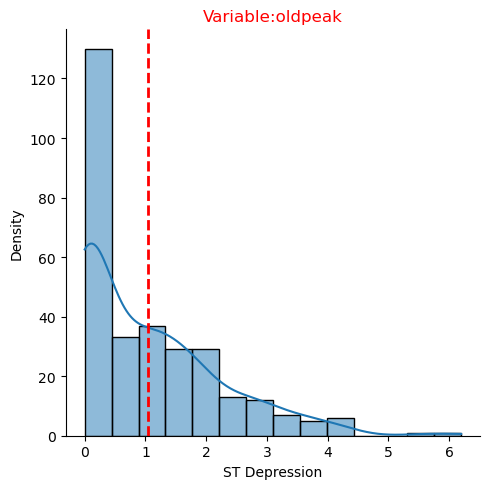

In [79]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]
list(zip(numeric_var, numeric_axis_name))
for n, m in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (4, 3), dpi = 80)
    sns.displot(heart[n], kde = True)
    plt.axvline(heart[n].mean(), color='red', linestyle='--', linewidth=2)
    plt.title('Variable:' + n, color='red')
    plt.xlabel(m)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()